In [110]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [111]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\asus\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [112]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
csv_path=os.path.join(path,"online_retail_II.xlsx")

In [114]:
df=pd.read_excel(csv_path)

In [115]:
#for sureity you are using right path
import os

# List files in the downloaded directory
print(os.listdir(path))


['online_retail_II.xlsx']


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [117]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [118]:
print(df['Description'].value_counts().head(10))

Description
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
60 TEATIME FAIRY CAKE CASES           1400
HOME BUILDING BLOCK WORD              1386
JUMBO BAG RED RETROSPOT               1310
LUNCH BAG RED SPOTTY                  1274
REX CASH+CARRY JUMBO SHOPPER          1232
Name: count, dtype: int64


In [119]:
df=df.dropna(subset=['Description','Customer ID'])

In [120]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [121]:
df.duplicated().sum()

6771

In [122]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [123]:
dfstrip=df.columns.str.strip()

In [125]:
df=df[df['Quantity']>0]#atleast no returns and negative transaction

In [127]:
df=df[df['Price']>0]# price should be positive if there have any free items in data set


In [130]:
df['Sales']=df['Quantity']*df['Price']
df['Sales'].head()

0     83.4
1     81.0
2     81.0
3    100.8
4     30.0
Name: Sales, dtype: float64

In [133]:
df['InvoiceDate']

0        2009-12-01 07:45:00
1        2009-12-01 07:45:00
2        2009-12-01 07:45:00
3        2009-12-01 07:45:00
4        2009-12-01 07:45:00
                 ...        
525456   2010-12-09 20:01:00
525457   2010-12-09 20:01:00
525458   2010-12-09 20:01:00
525459   2010-12-09 20:01:00
525460   2010-12-09 20:01:00
Name: InvoiceDate, Length: 400916, dtype: datetime64[ns]

In [143]:
df['Month']=df['InvoiceDate'].dt.to_period('M')
monthly_sales=df.groupby('Month')['Sales'].sum()



In [144]:
monthly_sales.sum()


8798233.743999999

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Month'>

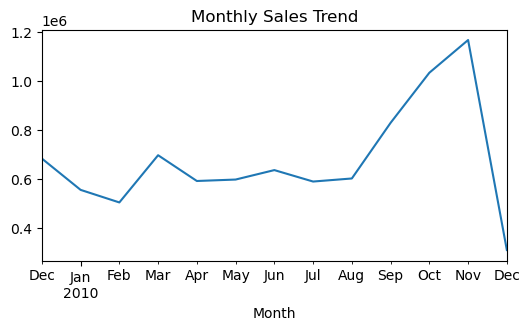

In [149]:
monthly_sales.plot(kind='line',figsize=(6,3),title='Monthly Sales Trend')

<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='Description'>

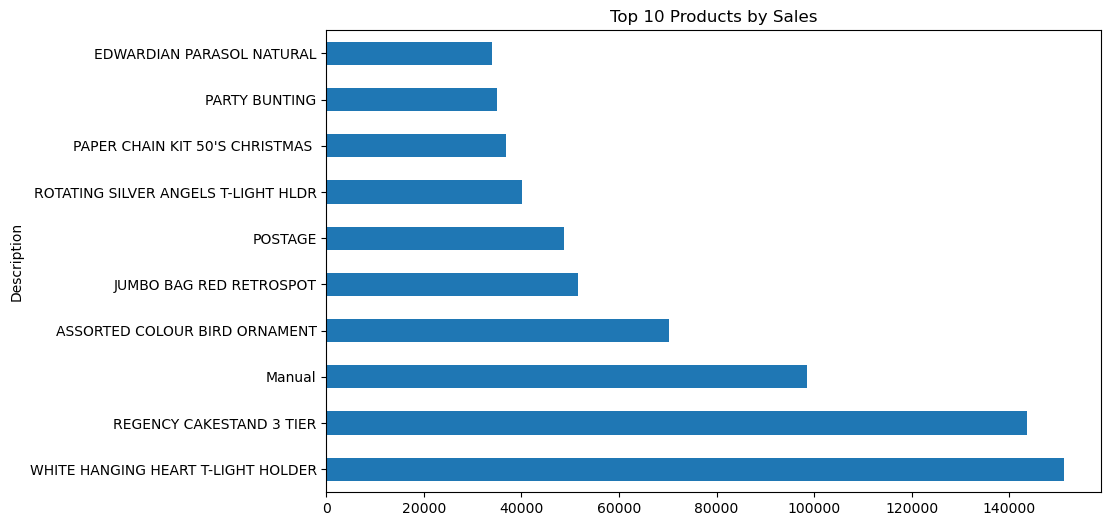

In [154]:
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='barh', figsize=(10, 6), title='Top 10 Products by Sales')


In [160]:
top_countries=df[df['Country'] != 'United Kingdom'].groupby('Country')['Sales'].sum().sort_values(ascending=False).head()

In [161]:
top_countries.head()

Country
EIRE           356041.860
Netherlands    268784.350
Germany        202025.391
France         146107.070
Sweden          53147.990
Name: Sales, dtype: float64

In [165]:
top_customers=df.groupby('Customer ID')['Sales'].sum().sort_values(ascending=True).head()

In [166]:
top_customers.head()

Customer ID
14095.0    2.95
13788.0    3.75
15913.0    6.30
15040.0    7.49
18115.0    9.70
Name: Sales, dtype: float64

<Axes: title={'center': 'top customers'}, ylabel='Customer ID'>

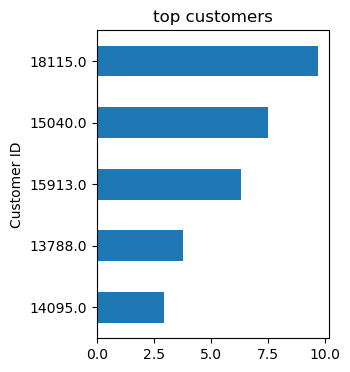

In [173]:
top_customers.plot(kind='barh',figsize=(3,4),title="top customers")

<Axes: title={'center': ' Sales by Hour of Day'}, xlabel='Hour'>

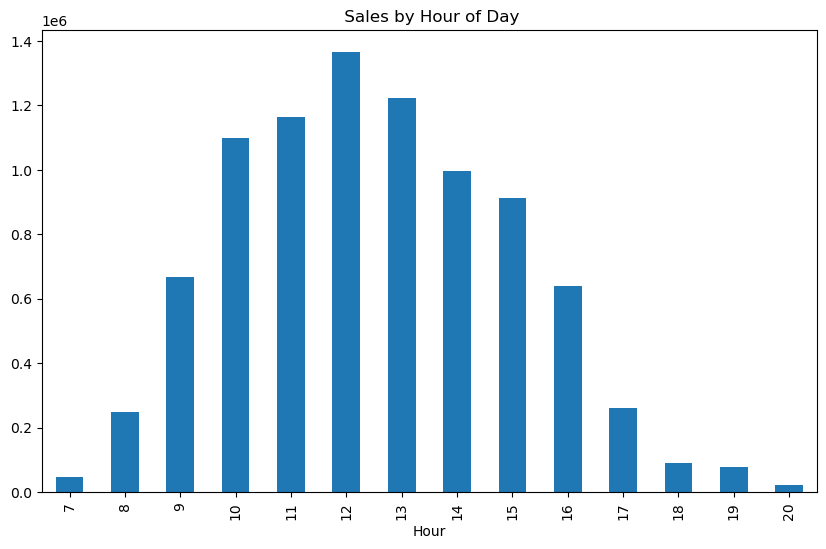

In [176]:
df['Hour'] = df['InvoiceDate'].dt.hour

df.groupby('Hour')['Sales'].sum().plot(kind='bar', figsize=(10, 6), title=' Sales by Hour of Day')


<Axes: title={'center': ' Daily Orders Trend'}, xlabel='InvoiceDateOnly'>

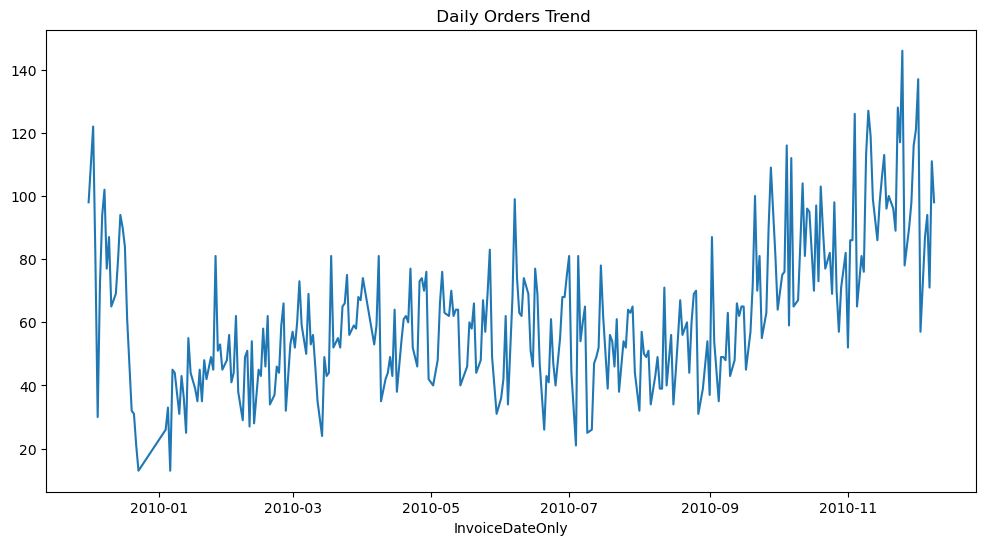

In [180]:
df['InvoiceDateOnly'] = df['InvoiceDate'].dt.date

orders_per_day = df.groupby('InvoiceDateOnly')['Invoice'].nunique()

orders_per_day.plot(kind='line', figsize=(12, 6), title=' Daily Orders Trend')



DATA CLEANING AND PRE-PROCESSING IS DONE


In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# 1. Select features and target
X = df[['Quantity', 'Price', 'Country', 'YearMonth']].copy()  # Make an explicit copy

X['YearMonth'] = X['YearMonth'].astype(str)  # Now safe to modify

y = df['Sales']

# 2. Preprocess YearMonth to numeric (convert period to string or int)
X['YearMonth'] = X['YearMonth'].astype(str)

# 3. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Define categorical and numerical features
categorical_features = ['Country', 'YearMonth']
numerical_features = ['Quantity', 'Price']

# 5. Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

# 6. Create regression pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# 7. Train model
model.fit(X_train, y_train)

# 8. Predict on test set
y_pred = model.predict(X_test)

# 9. Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2862.10
R^2 Score: 0.53


In [184]:
#Now work on to improve accuracy
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # Monday=0, Sunday=6
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)  # Weekend flag
df['Hour'] = df['InvoiceDate'].dt.hour


In [185]:

X = df[['Quantity', 'Price', 'Country', 'Year', 'Month', 'DayOfWeek', 'IsWeekend', 'Hour']].copy()
y = df['Sales']


In [187]:
#now trying with random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np



In [188]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Categorical and numerical features
categorical_features = ['Country']
numerical_features = ['Quantity', 'Price', 'Year', 'Month', 'DayOfWeek', 'IsWeekend', 'Hour']

In [189]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ])

In [190]:
# Model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [191]:
# Cross-validation for accuracy estimate
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validated R^2 scores: {cv_scores}')
print(f'Mean CV R^2: {np.mean(cv_scores):.4f}')

KeyboardInterrupt: 

In [192]:
# Train and evaluate on test data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Test set MSE: {mse:.2f}')
print(f'Test set R^2: {r2:.4f}')


KeyboardInterrupt: 

SyntaxError: invalid syntax (2565456827.py, line 1)